In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

In [4]:
df_ = pd.read_hdf('../../data/caterpillar/raw/labeled_94638_all.h5', key='star')
print(len(df_))
df_.head()

1032301


,jzstar,jrstar,jphistar,vxstar,vystar,vzstar,xstar,ystar,zstar,idstar,...,cluster_id,rstar,phistar,vrstar,vphistar,vstar,kestar,lxstar,lystar,lzstar
35353,0.771706,1.066155,-1.248549,-158.509934,110.282841,-160.380032,-0.009334,-0.001382,0.000077,567.0,...,1,0.009436,-2.994563,140.643193,-132.314764,251.016850,31504.729443,0.213168,-1.509330,-1.248549
35354,0.073215,1.133259,-0.012431,-25.212583,-30.772049,164.125576,0.000622,0.000267,-0.014710,567.0,...,1,0.000677,0.404644,-35.291185,-18.360981,168.878056,14259.898963,-0.408899,0.268723,-0.012431
35355,1.938071,2.291189,0.460224,-54.080167,14.284162,-189.270579,0.006917,0.006683,-0.030814,567.0,...,1,0.009618,0.768162,-28.968992,47.848711,197.362747,19476.026872,-0.824732,2.975695,0.460224
35356,2.481847,2.824102,0.220001,62.981674,-28.856594,-6.744534,0.044120,-0.023708,0.012247,567.0,...,1,0.050086,-0.493077,69.138273,4.392440,69.605194,2422.441538,0.513309,1.068914,0.220001
35357,1.602451,0.905556,-0.205589,21.133583,-12.044617,182.430322,0.000254,0.009583,0.014926,567.0,...,1,0.009587,1.544284,-11.480142,-21.445454,184.044895,16936.261750,1.928050,0.269078,-0.205589


In [5]:
df = df_.loc[~df_['jzstar'].isnull()]
print(len(df))
df.head()

1032301


,jzstar,jrstar,jphistar,vxstar,vystar,vzstar,xstar,ystar,zstar,idstar,...,cluster_id,rstar,phistar,vrstar,vphistar,vstar,kestar,lxstar,lystar,lzstar
35353,0.771706,1.066155,-1.248549,-158.509934,110.282841,-160.380032,-0.009334,-0.001382,0.000077,567.0,...,1,0.009436,-2.994563,140.643193,-132.314764,251.016850,31504.729443,0.213168,-1.509330,-1.248549
35354,0.073215,1.133259,-0.012431,-25.212583,-30.772049,164.125576,0.000622,0.000267,-0.014710,567.0,...,1,0.000677,0.404644,-35.291185,-18.360981,168.878056,14259.898963,-0.408899,0.268723,-0.012431
35355,1.938071,2.291189,0.460224,-54.080167,14.284162,-189.270579,0.006917,0.006683,-0.030814,567.0,...,1,0.009618,0.768162,-28.968992,47.848711,197.362747,19476.026872,-0.824732,2.975695,0.460224
35356,2.481847,2.824102,0.220001,62.981674,-28.856594,-6.744534,0.044120,-0.023708,0.012247,567.0,...,1,0.050086,-0.493077,69.138273,4.392440,69.605194,2422.441538,0.513309,1.068914,0.220001
35357,1.602451,0.905556,-0.205589,21.133583,-12.044617,182.430322,0.000254,0.009583,0.014926,567.0,...,1,0.009587,1.544284,-11.480142,-21.445454,184.044895,16936.261750,1.928050,0.269078,-0.205589


In [6]:
print(df.columns)

Index(['jzstar', 'jrstar', 'jphistar', 'vxstar', 'vystar', 'vzstar', 'xstar',
       'ystar', 'zstar', 'idstar', 'estar', 'snapstar', 'massstar', 'timestar',
       'redshiftstar', 'cluster_id', 'rstar', 'phistar', 'vrstar', 'vphistar',
       'vstar', 'kestar', 'lxstar', 'lystar', 'lzstar'],
      dtype='object')


In [10]:
chosen_ids = np.random.choice(len(df), min(len(df), 100000))
df = df.iloc[chosen_ids].copy()

In [11]:
df = df.loc[(df['xstar']-0.0082)**2 + df['ystar']**2 + df['zstar']**2 < 0.01**2]

In [15]:
df['cluster_name'] = [f'cluster {cluster}' for cluster in df['cluster_id']]
from collections import Counter
counts = Counter(df['cluster_id']).most_common()[:5]
df = df.loc[np.isin(df['cluster_id'], counts)]

<AxesSubplot: xlabel='phistar', ylabel='rstar'>

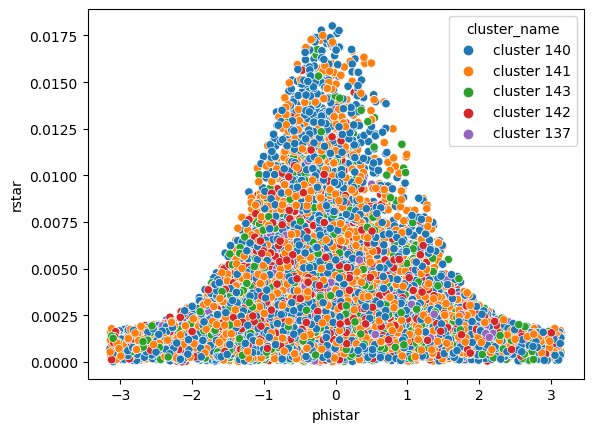

In [16]:
sns.scatterplot(data=df, x='phistar', y='rstar', hue='cluster_name')

In [12]:
rvec = np.stack([df['xstar'], df['ystar'], df['zstar']], axis=-1)
vvec = np.stack([df['vxstar'], df['vystar'], df['vzstar']], axis=-1)
lvec = np.cross(rvec, vvec)

In [14]:
print(lvec[:,2])
print(df['jphistar'])

[-0.51218258  1.01740742 -0.04990809 ...  0.21281791 -0.75023921
  2.28752888]
164169   -0.512183
766481    1.017407
61949    -0.049908
24036    -0.575746
123261   -0.040119
            ...   
245319    0.044224
47291    -1.499897
669666    0.212818
40722    -0.750239
716469    2.287529
Name: jphistar, Length: 100000, dtype: float64


<AxesSubplot:xlabel='vphistar', ylabel='estar'>

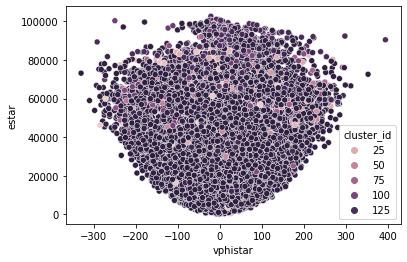

In [23]:
sns.scatterplot(data=df, x='vphistar', y='estar',hue='cluster_id')

<AxesSubplot:xlabel='jphistar', ylabel='estar'>

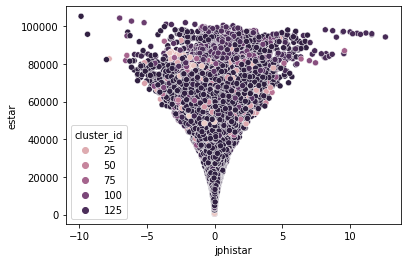

In [8]:
sns.scatterplot(data=df, x='jphistar', y='estar', hue='cluster_id')

In [58]:
sunx, suny, sunz = 8.2/1000,0/1000,0 # all units in kiloparsecs
radius = 0.005 # 5 kiloparsecs

In [59]:
df_ = df_.loc[(df_['xstar']-sunx)**2 + (df_['ystar']-suny)**2 + (df_['zstar']-sunz)**2 < radius**2]

In [60]:
print(len(df_))

24154


In [61]:
def filter_clusters(df, filter_size):
    counter = Counter(df['cluster_id'].to_numpy())
    large_keys = [key for key in counter.keys() if counter[key] > filter_size]
    return df.loc[df['cluster_id'].isin(large_keys)]

In [62]:
df_ = filter_clusters(df_, 10)

In [63]:
print(len(df_), Counter(df_['cluster_id']).most_common())

23951 [(140, 9741), (141, 6862), (143, 2643), (142, 2176), (137, 530), (136, 364), (133, 272), (129, 178), (131, 155), (130, 125), (134, 121), (128, 94), (123, 92), (105, 67), (127, 65), (132, 52), (125, 51), (48, 33), (54, 32), (69, 31), (51, 25), (80, 25), (122, 25), (2, 21), (82, 20), (18, 19), (71, 18), (23, 17), (96, 16), (28, 15), (94, 15), (37, 14), (15, 13), (90, 13), (103, 11)]


<AxesSubplot:xlabel='xstar', ylabel='zstar'>

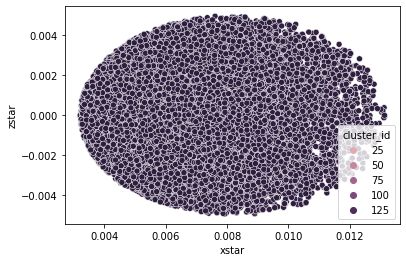

In [64]:
sns.scatterplot(data=df_, x='xstar', y='zstar', hue='cluster_id')

In [89]:
chosen_ids = np.random.choice(len(df_), min(len(df_), 100000), replace=False)
df = df_.iloc[chosen_ids].copy()

<AxesSubplot:xlabel='jphistar', ylabel='estar'>

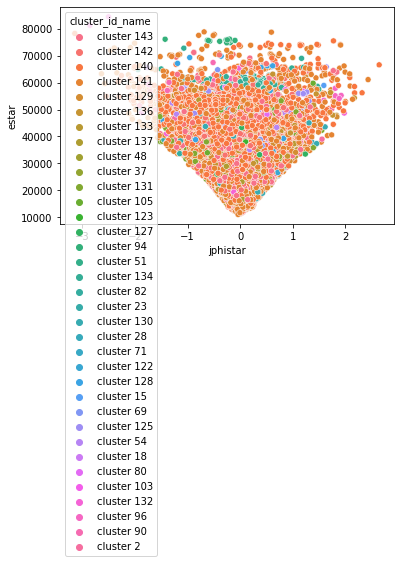

In [90]:
df['cluster_id_name'] = [f'cluster {i}' for i in df['cluster_id']]
sns.scatterplot(data=df, x='jphistar', y='estar', hue='cluster_id_name')

<AxesSubplot:xlabel='xstar', ylabel='ystar'>

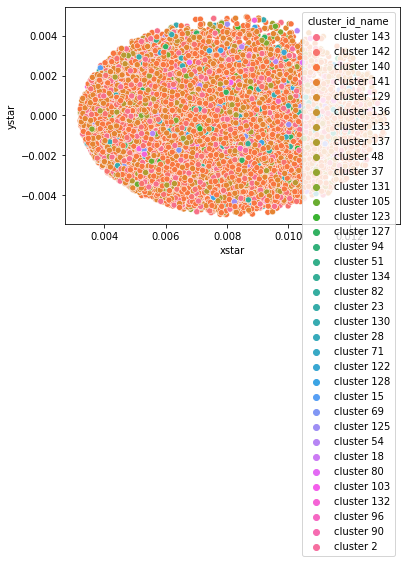

In [91]:
sns.scatterplot(data=df, x='xstar', y='ystar', hue='cluster_id_name')

In [152]:
cluster_ids = [i for i,c in Counter(df['cluster_id']).most_common()[:10]]
print(cluster_ids)
print(Counter(df['cluster_id']).most_common()[:10])

[219, 218, 214, 207, 221, 213, 215, 211, 217, 212]
[(219, 12675), (218, 3354), (214, 953), (207, 819), (221, 592), (213, 315), (215, 274), (211, 109), (217, 98), (212, 86)]


In [153]:
df_small = df.loc[df['cluster_id'].isin(cluster_ids)]

In [154]:
df_small.head()

,jzstar,jrstar,jphistar,vstar,xstar,ystar,zstar,idstar,estar,cluster_id,cluster_id_name
421023,0.003544,0.235801,0.184421,90.652432,0.005378,0.002538,-0.000594,2301.0,27701.479892,219,cluster 219
210082,0.293073,0.078458,1.061427,182.978638,0.006554,-0.003683,0.000957,372907.0,40091.023396,218,cluster 218
316390,0.022029,0.296482,0.082167,89.326598,0.005700,-0.002066,-0.001554,372907.0,24720.670791,218,cluster 218
100434,0.008813,1.183410,0.972608,253.675671,0.007321,-0.001450,0.000852,333551.0,57269.065421,207,cluster 207
583304,0.072428,0.148261,-0.267176,82.875367,0.005379,0.003308,-0.000430,2301.0,28176.819588,219,cluster 219


## Plotting Caterpillar Data

<AxesSubplot: xlabel='jrstar', ylabel='jzstar'>

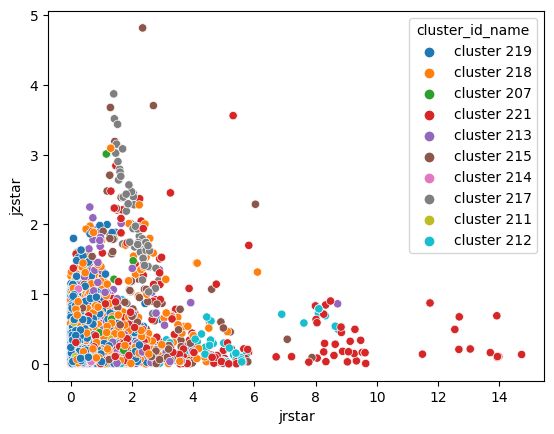

In [169]:
sns.scatterplot(data=df_small, x='jrstar', y='jzstar', hue='cluster_id_name')

<AxesSubplot: >

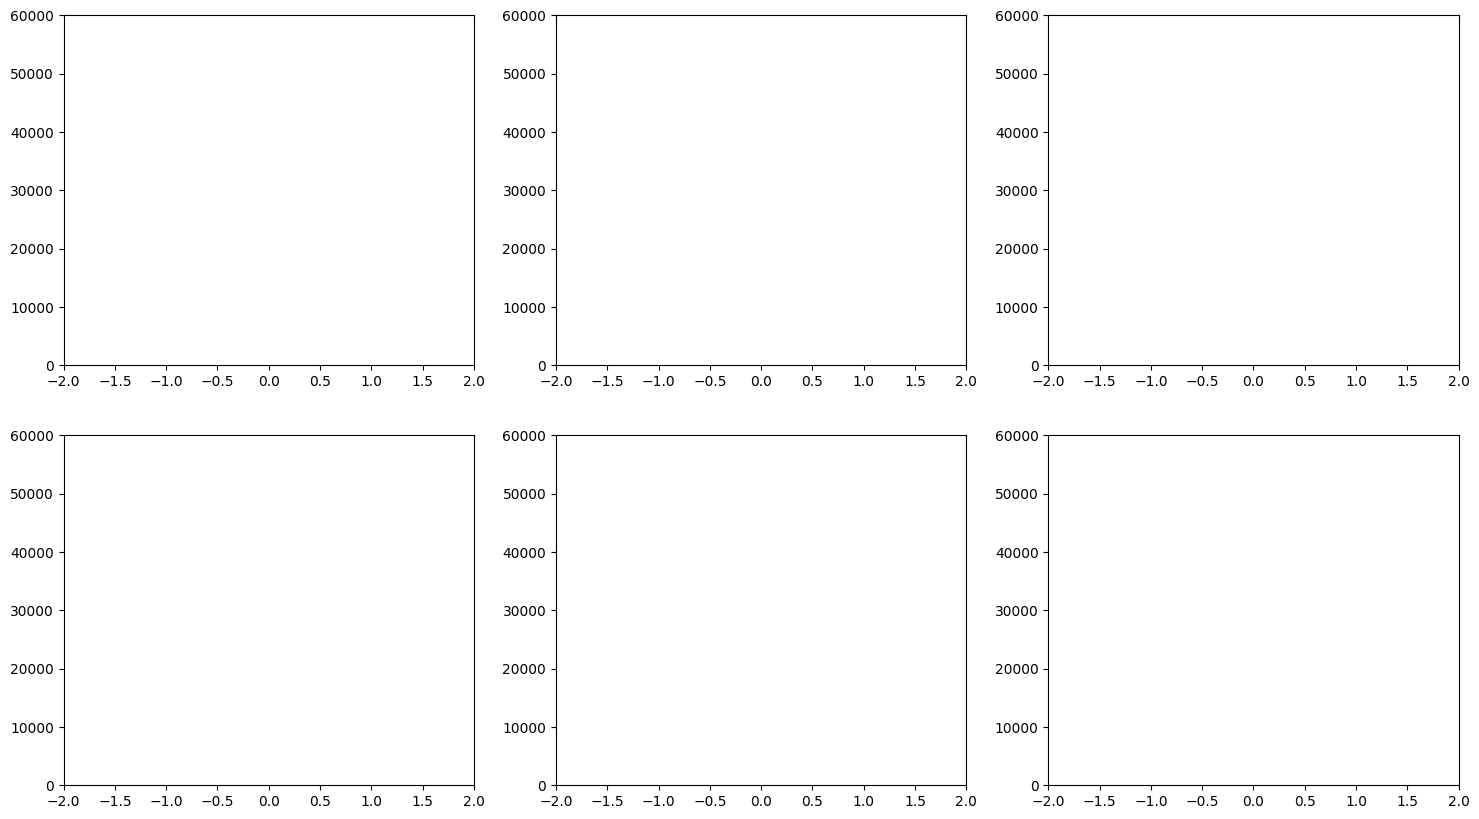

In [113]:
sample_ids = np.random.choice(len(df_small), min(len(df_small), 2000), replace=False)
df_small_ = df_small.iloc[sample_ids].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_small_1 = df_small_.loc[df_small_['cluster_id'] == 80]
df_small_2 = df_small_.loc[df_small_['cluster_id'] == 79]
df_small_3 = df_small_.loc[df_small_['cluster_id'] == 74]
df_small_4 = df_small_.loc[df_small_['cluster_id'] == 76]
df_small_5 = df_small_.loc[df_small_['cluster_id'] == 78]
df_small_6 = df_small_.loc[df_small_['cluster_id'] == 50]

[ax.set_ylim(0, 60000) for ax in axes.flatten()]
[ax.set_xlim(-2, 2) for ax in axes.flatten()]


sns.scatterplot(data=df_small_1, ax=axes[0,0], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_2, ax=axes[0,1], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_3, ax=axes[0,2], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_4, ax=axes[1,0], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_5, ax=axes[1,1], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_6, ax=axes[1,2], x='jphistar', y='estar', hue='cluster_id_name')

<AxesSubplot:>

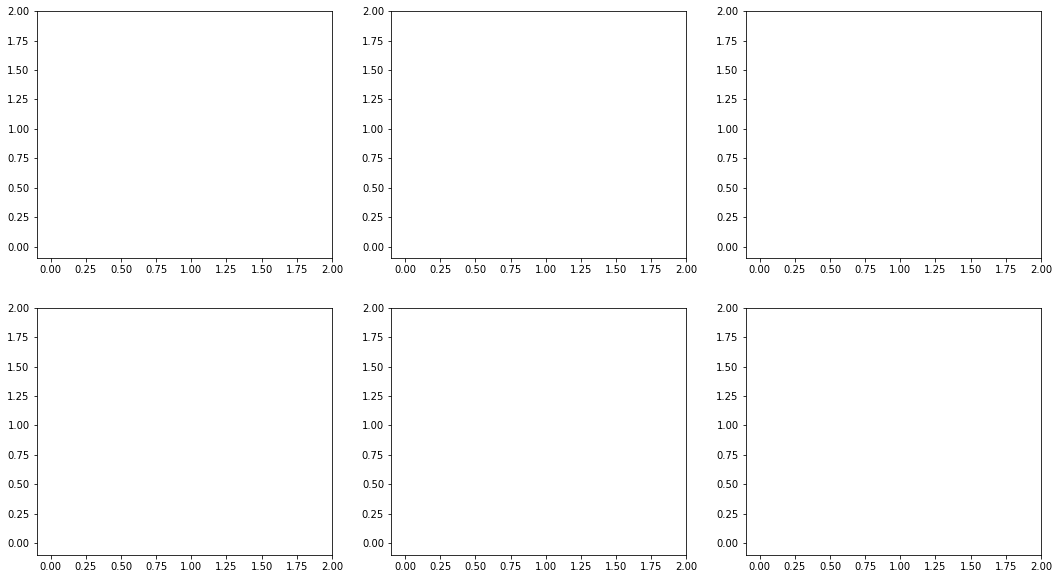

In [55]:
sample_ids = np.random.choice(len(df_small), min(len(df_small), 2000), replace=False)
df_small_ = df_small.iloc[sample_ids].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_small_1 = df_small_.loc[df_small_['cluster_id'] == 80]
df_small_2 = df_small_.loc[df_small_['cluster_id'] == 79]
df_small_3 = df_small_.loc[df_small_['cluster_id'] == 74]
df_small_4 = df_small_.loc[df_small_['cluster_id'] == 76]
df_small_5 = df_small_.loc[df_small_['cluster_id'] == 78]
df_small_6 = df_small_.loc[df_small_['cluster_id'] == 50]

[ax.set_ylim(-0.1, 2) for ax in axes.flatten()]
[ax.set_xlim(-0.1, 2) for ax in axes.flatten()]


sns.scatterplot(data=df_small_1, ax=axes[0,0], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_2, ax=axes[0,1], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_3, ax=axes[0,2], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_4, ax=axes[1,0], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_5, ax=axes[1,1], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_6, ax=axes[1,2], x='jzstar', y='jrstar', hue='cluster_id_name')

## Simple Clustering on Caterpillar Data

In [22]:
import sys
sys.path.append('../../')
from cluster_analysis import *
from evaluation_metrics import *
from neural_dataset import *

In [23]:
feature_columns = ['estar', 'jrstar', 'jzstar', 'jphistar']
df_norm = pd.DataFrame({'mean':{feature : df[feature].mean() for feature in feature_columns}, \
                        'std':{feature : df[feature].std() for feature in feature_columns}})

In [25]:
dataset = ClusterDataset(df, feature_columns, 'cluster_id', feature_norms=df_norm)
features = dataset.features.numpy()
labels = dataset.labels.numpy()

In [26]:
def evaluate_once(features, labels, clusterer):
    clusterer.add_data(features)
    clusters = clusterer.fit()
    cluster_eval = ClusterEvalAll(clusters, labels)
    print(cluster_eval())
    return cluster_eval()

In [29]:
clusterer = C_HDBSCAN(metric='manhattan', min_cluster_size=10, min_samples=5, cluster_selection_method='eom')
evaluate_once(features, labels, clusterer)

[ 4  6 53 59 81 82]
[0 6 1 3 5 4]
{'IoU_TP': 5, 'IoU_T': 126, 'IoU_P': 8, 'IoU_precision': 0.625, 'IoU_recall': 0.03968253968253968, 'IoU_F1': 0.07462686567164178, 'Mode_TP': 6, 'Mode_T': 126, 'Mode_P': 8, 'Mode_precision': 0.75, 'Mode_recall': 0.047619047619047616, 'Mode_F1': 0.08955223880597014, 'Mode_TP_C': 3768, 'Mode_recall_C': 0.09017590044274261, 'Purity': 0.09132463802800048, 'AMI': 0.044270351659702736, 'ARand': 0.0014382765591704426, 'ModeSoft_TP': 6, 'ModeSoft_T': 126, 'ModeSoft_P': 8, 'ModeSoft_precision': 0.75, 'ModeSoft_recall': 0.047619047619047616, 'ModeSoft_F1': 0.08955223880597014, 'ModeSoft_TP_C': 3731.4471428569263, 'ModeSoft_recall_C': 0.0893011162583924, 'ModeProb_TP': 6, 'ModeProb_T': 126, 'ModeProb_P': 8, 'ModeProb_precision': 0.75, 'ModeProb_recall': 0.047619047619047616, 'ModeProb_F1': 0.08955223880597014}


{'IoU_TP': 5,
 'IoU_T': 126,
 'IoU_P': 8,
 'IoU_precision': 0.625,
 'IoU_recall': 0.03968253968253968,
 'IoU_F1': 0.07462686567164178,
 'Mode_TP': 6,
 'Mode_T': 126,
 'Mode_P': 8,
 'Mode_precision': 0.75,
 'Mode_recall': 0.047619047619047616,
 'Mode_F1': 0.08955223880597014,
 'Mode_TP_C': 3768,
 'Mode_recall_C': 0.09017590044274261,
 'Purity': 0.09132463802800048,
 'AMI': 0.044270351659702736,
 'ARand': 0.0014382765591704426,
 'ModeSoft_TP': 6,
 'ModeSoft_T': 126,
 'ModeSoft_P': 8,
 'ModeSoft_precision': 0.75,
 'ModeSoft_recall': 0.047619047619047616,
 'ModeSoft_F1': 0.08955223880597014,
 'ModeSoft_TP_C': 3731.4471428569263,
 'ModeSoft_recall_C': 0.0893011162583924,
 'ModeProb_TP': 6,
 'ModeProb_T': 126,
 'ModeProb_P': 8,
 'ModeProb_precision': 0.75,
 'ModeProb_recall': 0.047619047619047616,
 'ModeProb_F1': 0.08955223880597014}

In [34]:
clusterer = C_GaussianMixture(n_components=126)
evaluate_once(features, labels, clusterer)

[  1   3   4  19  53  59  72  81  82 105]
[  7  93  17  97  32 113  41  10   5  53]
{'IoU_TP': 9, 'IoU_T': 126, 'IoU_P': 126, 'IoU_precision': 0.07142857142857142, 'IoU_recall': 0.07142857142857142, 'IoU_F1': 0.07142857142857142, 'Mode_TP': 42, 'Mode_T': 126, 'Mode_P': 126, 'Mode_precision': 0.3333333333333333, 'Mode_recall': 0.3333333333333333, 'Mode_F1': 0.3333333333333333, 'Mode_TP_C': 4966, 'Mode_recall_C': 0.11884647600813689, 'Purity': 0.2731602249611104, 'AMI': 0.32610344860339985, 'ARand': 0.07663742142115489, 'ModeSoft_TP': 39, 'ModeSoft_T': 126, 'ModeSoft_P': 126, 'ModeSoft_precision': 0.30952380952380953, 'ModeSoft_recall': 0.30952380952380953, 'ModeSoft_F1': 0.30952380952380953, 'ModeSoft_TP_C': 4816.734159999988, 'ModeSoft_recall_C': 0.11527424099557229, 'ModeProb_TP': 10, 'ModeProb_T': 126, 'ModeProb_P': 126, 'ModeProb_precision': 0.07936507936507936, 'ModeProb_recall': 0.07936507936507936, 'ModeProb_F1': 0.07936507936507936}


{'IoU_TP': 9,
 'IoU_T': 126,
 'IoU_P': 126,
 'IoU_precision': 0.07142857142857142,
 'IoU_recall': 0.07142857142857142,
 'IoU_F1': 0.07142857142857142,
 'Mode_TP': 42,
 'Mode_T': 126,
 'Mode_P': 126,
 'Mode_precision': 0.3333333333333333,
 'Mode_recall': 0.3333333333333333,
 'Mode_F1': 0.3333333333333333,
 'Mode_TP_C': 4966,
 'Mode_recall_C': 0.11884647600813689,
 'Purity': 0.2731602249611104,
 'AMI': 0.32610344860339985,
 'ARand': 0.07663742142115489,
 'ModeSoft_TP': 39,
 'ModeSoft_T': 126,
 'ModeSoft_P': 126,
 'ModeSoft_precision': 0.30952380952380953,
 'ModeSoft_recall': 0.30952380952380953,
 'ModeSoft_F1': 0.30952380952380953,
 'ModeSoft_TP_C': 4816.734159999988,
 'ModeSoft_recall_C': 0.11527424099557229,
 'ModeProb_TP': 10,
 'ModeProb_T': 126,
 'ModeProb_P': 126,
 'ModeProb_precision': 0.07936507936507936,
 'ModeProb_recall': 0.07936507936507936,
 'ModeProb_F1': 0.07936507936507936}